ChEn-5310: Computational Continuum Transport Phenomena Spring 2021 UMass Lowell; Prof. V. F. de Almeida **17Feb21**

# 05. Poisson 1D MOOSE Application
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
* [Problem Statement](#statement)
* [Problem Setup](#setup)
 + [Application](#app)
 + [Diffusion Term Kernel](#diff)
 + [Source Term Kernel](#source)
 + [Compile Application](#compile)
 + [Input File](#input)
 + [Run App](#run)
* [Linear Lagrange FEM Results](#linearfem)
* [Quadratic Lagrange FEM Results](#quadfem)
---

## [Objectives](#toc)<a id="obj"></a>

 + Begin using MOOSE to practice solving ODE's.

## [Strong Form Statement of Poisson 1D Problem](#toc)<a id="statem"></a>

Solve the Poisson model problem. Find $u:[a,b]\in\Reals\rightarrow\Reals$ for $D \ne 0$ such that:

\begin{align*}
 -\bigl(-D(u,x)\, u'\bigr)'(x) + S(u,x) &= 0 \quad \forall \quad x\in [a,b], \\
 u(a) &= A, \\
 u(b) &= B.
\end{align*}
   
Solve this problem analytically for constant diffusion coefficient, $D$, and source, $S$.

## [Weak Galerkin Form Statement of Poisson 1D Problem](#toc)<a id="statem"></a>

To appear...

## [Problem Setup](#toc)<a id="setup"></a>

We need to create a MOOSE *application* with two MOOSE *kernels* and an *input* file. The ODE problem has a diffusion and a source term. Therefore a good way to proceed is to have two MOOSE kernels coded in C++ programming language.

#### [MOOSE App Creation](#toc)<a id="app"></a>

1. Make sure `MOOSE` has been installed and most tests passed successfully.
1. `cd ~/moose`
1. `cd ..`
1. `./moose/scripts/stork.sh Engy5310P1`
1. Disregard the `github` setup
1. `cd engy5310p1`
1. `make`
1. `./run_tests`
1. `cp test/tests/kernels/simple_diffusion/simple_diffusion.i input.i`
1. Cleanup: `rm -rf test/, unit/, doc/, scripts/, and run_tests`
1. Edit `src/main.C`
 - Replace `Engy5310P1TestApp` with `Engy5310P1App`
1. `make clean`
1. `make`
1. Test run 
 + `./engy5310p1-opt -i input.i`
1. Use [`VisIt`](https://wci.llnl.gov/simulation/computer-codes/visit) or `Paraview` to visualize `test_out.e`

#### [Add a Diffusion Term Kernel](#toc)<a id="diff"></a>
1. `cd include`
1. `mkdir kernels`
1. `cd kernels`
1. Create a `DiffusionTerm.h` class interface.
 + Use the `EquationTerm.h` template as follows:
 + `cp *path-to*/moose-app-templates/EquationTerm.h .`
 + `mv EquationTerm.h DiffusionTerm.h`
1. `cd ../..`
1. `cd src`
1. `mkdir kernels`
1. `cd kernels`
1. Create a `DiffusionTerm.C` class implementation.
 + Use the `EquationTerm.C` template as follows.
 + `cp *path-to*/moose-app-templates/EquationTerm.C .`
 + `mv EquationTerm.C DiffusionTerm.C`

#### [Add a Source Term Kernel](#toc)<a id="source"></a>
1. `cd include`
1. `mkdir kernel`
1. Create a `SourceTerm.h` class interface.
  + Use the `EquationTerm.h` template.
1. Create a `SourceTerm.C` class implementation.
  + Use the `EquationTerm.h` template.

#### [Compile Application](#toc)<a id="compile"></a>

1. `cd ../..`
1. `pwd`
  + `.../engy5310p1`
1. `make`

+ Linking Library .../engy5310p1/lib/libengy5310p1-opt.la...

+ Linking Executable .../engy5310p1/engy5310p1-opt...

#### [Input File](#toc)<a id="input"></a>

Any line in the input file below without a comment (any text to the righ of *#*) refers to a MOOSE framework parameter. Consult the documentation for further info on these parameters. All user-app parameters for this problem are described with comments below. Use the content below to create a `input.i` input file.
```
[Mesh]
 [1d]                                 # any lower case name; this is our 1D block
  type = GeneratedMeshGenerator  
  dim = 1 
  xmin = -1.00000e+01 
  xmax = 1.10000e+01 
  nx = 1 
 []
[]

[Variables]
 [u]                                 # our unknown variable to be related to below
  order = first
  family = lagrange
 []
[]

[Kernels]
 [diffusion-term]                    # our diffusion term kernel implemented in the app
  type = DiffusionTerm               # our name for the diffusion kernel C++ class
  variable = u                       # our unknown variable from the [Variables] block
  diffCoeff = 5.00000e+00            # our defined diffusion coefficient C++ variable
 []
 [source-term]                       # our source term kernel implemented in the app
  type = SourceTerm                  # our name for the source kernel C++ class
  variable = u                       # our unknown variable from the [Variables] block
  sourceS = 1.30000e+01              # our defined source constant C++ variable
 []
[]

[BCs]
 [left]                              # our name for the left side of the boundary of the domain
  type = DirichletBC
  variable = u                       # our unknown variable from the [Variables] block
  boundary = left
  value = 5.00000e+00
 []
 [right]                             # our name for the left side of the boundary of the domain
  type = DirichletBC
  variable = u                       # our unknown variable from the [Variables] block
  boundary = right
  value = 1.89000e+02
 []
[]

[Executioner]
 type = Steady
 solve_type = 'PJFNK'
 petsc_options_iname = '-pc_type -pc_hypre_type'
 petsc_options_value = 'hypre boomeramg'
[]

[VectorPostprocessors]
 [u]                                 # our unknown variable
  type = LineValueSampler
  execute_on = 'timestep_end final'
  variable = 'u'                     # our unknown variable from the [Variables] block
  start_point = '-1.00000e+01 0 0'
  end_point = '1.10000e+01 0 0'
  num_points = 7
  sort_by = id
 []
[]

[Outputs]
 [csv]                              # our choice for data output: tabular
  type = CSV
  file_base = 'output'
  execute_on = 'final'
 []
[]

```

#### [Run Application](#toc)<a id="run"></a>

1. `engy5310p1-opt -i input.i`

## [Linear Lagrange FEM](#toc)<a id="linearfem"></a>

Solve problem with parameter values:

> + a = -10
> + b = 11
> + A = 5
> + B = 189
> + D = 5.0
> + S = 13

FEM parameters:

> + Basis Functions: First Order Lagrangian
> + num. of finite elements: 3

In [13]:
'''FEM Solution'''

x_a = -10.0
x_b = 11.0
u_a = 5
u_b = 189

diff_coeff = 5.0
source_s = 13

n_felem = 3
order = 'first'
n_plot_pts = 2*n_felem + 1

from engy_5310.toolkit import run_engy5310_p1

run_engy5310_p1(x_a, x_b, u_a, u_b, diff_coeff, source_s, n_felem, order, n_plot_pts)

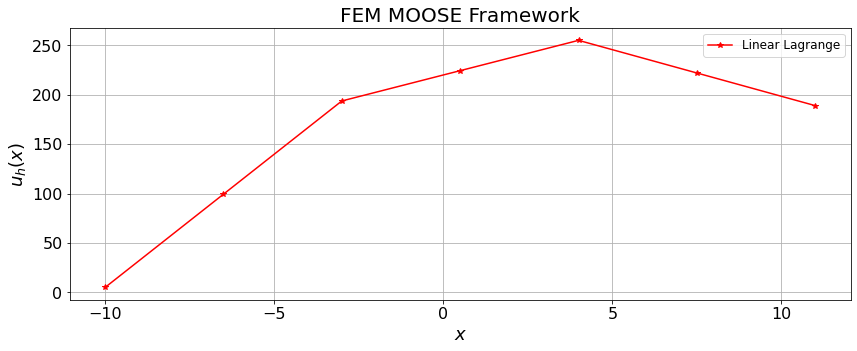

In [14]:
'''Show FEM Solution'''

import pandas as pd

df = pd.read_csv('engy5310p1/output_u_0002.csv')
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(14, 5))
plt.plot(df['x'], df['u'],'r*-',label='Linear Lagrange')
plt.title('FEM MOOSE Framework', fontsize=20)
plt.ylabel(r'$u_h(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

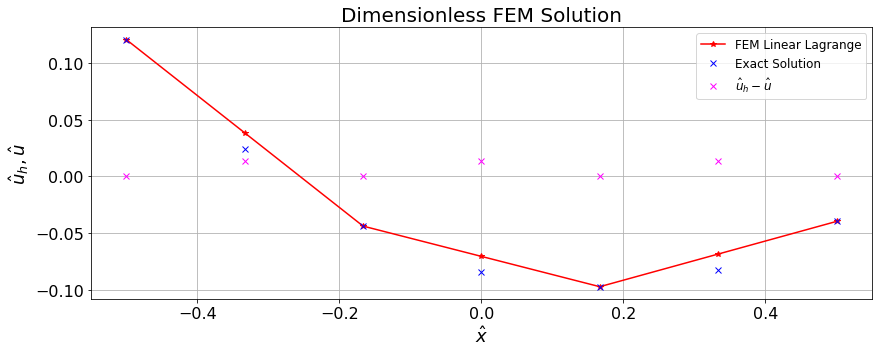

In [4]:
'''Error'''

from engy_5310.toolkit import engy5310_p1_exact_solution  
u_hat = engy5310_p1_exact_solution(x_a, x_b, u_a, u_b, diff_coeff, source_s)

L = df['x'].max() - df['x'].min()
x_hat = (df['x'] - df['x'].min())/L - 0.5

C = - source_s / diff_coeff
uh_hat = df['u']/C/L**2 + 1/8

plt.figure(1, figsize=(14, 5))
plt.plot(x_hat, uh_hat,'r-*',label='FEM Linear Lagrange')
plt.plot(x_hat, u_hat.values(x_hat),'bx',label='Exact Solution')
plt.plot(x_hat, uh_hat-u_hat.values(x_hat),'x',color='magenta',label=r'$\hat{u}_h-\hat{u}$')
plt.title('Dimensionless FEM Solution', fontsize=20)
plt.ylabel(r'$\hat{u}_h, \hat{u}$', fontsize=18)
plt.xlabel(r'$\hat{x}$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()



## [Quadratic Lagrange FEM](#toc)<a id="quadfem"></a>

Solve problem with parameter values:

> + a = -10
> + b = 11
> + A = 5
> + B = 189
> + D = 5.0
> + S = 13

FEM parameters:

> + Basis Functions: Second Order Lagrangian
> + num. of finite elements: 1

In [8]:
'''FEM Solution'''

x_a = -10.0
x_b = 11.0
u_a = 5
u_b = 189

diff_coeff = 5.0
source_s = 13

n_felem = 1
order = 'second'
#n_plot_pts = 2*n_felem + 1
n_plot_pts = 15

from engy_5310.toolkit import run_engy5310_p1

run_engy5310_p1(x_a, x_b, u_a, u_b, diff_coeff, source_s, n_felem, order, n_plot_pts)

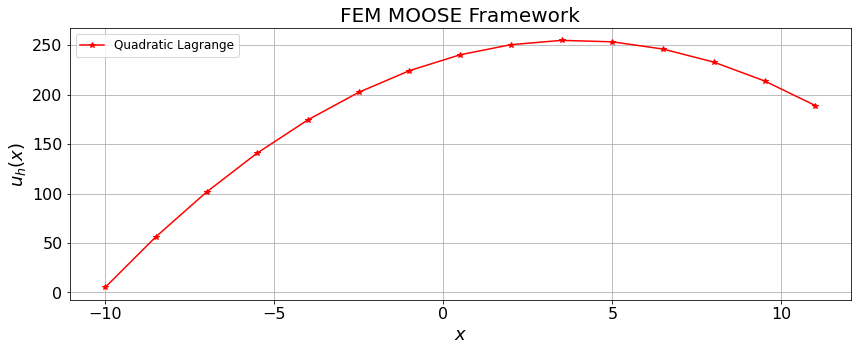

In [9]:
'''Show FEM Solution'''

import pandas as pd

df = pd.read_csv('engy5310p1/output_u_0002.csv')
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(14, 5))
plt.plot(df['x'], df['u'],'r*-',label='Quadratic Lagrange')
plt.title('FEM MOOSE Framework', fontsize=20)
plt.ylabel(r'$u_h(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

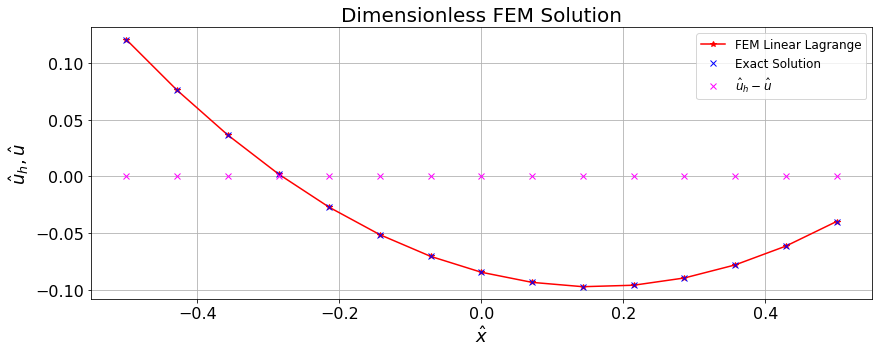

In [10]:
'''Error'''

from engy_5310.toolkit import engy5310_p1_exact_solution  
u_hat = engy5310_p1_exact_solution(x_a, x_b, u_a, u_b, diff_coeff, source_s)

L = df['x'].max() - df['x'].min()
x_hat = (df['x'] - df['x'].min())/L - 0.5

c = - source_s / diff_coeff
uh_hat = df['u']/c/L**2 + 1/8

plt.figure(1, figsize=(14, 5))
plt.plot(x_hat, uh_hat,'r-*',label='FEM Linear Lagrange')
plt.plot(x_hat, u_hat.values(x_hat),'bx',label='Exact Solution')
plt.plot(x_hat, uh_hat-u_hat.values(x_hat),'x',color='magenta',label=r'$\hat{u}_h-\hat{u}$')
plt.title('Dimensionless FEM Solution', fontsize=20)
plt.ylabel(r'$\hat{u}_h, \hat{u}$', fontsize=18)
plt.xlabel(r'$\hat{x}$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

